In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def kl_divergence(mu, m, Sigma, S):
    det_Sigma = np.linalg.det(Sigma)
    det_S = np.linalg.det(S)
    S_inv = np.linalg.inv(S)

    term1 = np.log(det_S/det_Sigma)+(m-mu).T@S_inv@(m-mu)+np.trace(S_inv@Sigma)-len(mu)
    return (1/2)*term1

def covariance_ellipse(cov, mean, ax, color = "green", n_std = 3):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', edgecolor=color)
    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



def kullback_leibler(mu1_x, mu1_y, mu2_x, mu2_y, cov1_xx, cov1_xy, cov1_yy, cov2_xx, cov2_xy, cov2_yy):

    fig, ax = plt.subplots(figsize=(3, 3))

    mu1 = np.array([mu1_x, mu1_y])
    mu2 = np.array([mu2_x, mu2_y])
    cov1 = np.array([[cov1_xx, cov1_xy], [cov1_xy, cov1_yy]])
    cov2 = np.array([[cov2_xx, cov2_xy], [cov2_xy, cov2_yy]])

    covariance_ellipse(cov1, mu1, ax, color = 'blue')
    covariance_ellipse(cov2, mu2, ax, color = 'red')

    ax.scatter(mu1[0], mu1[1], c='blue', s=3)
    ax.scatter(mu2[0], mu2[1], c='red', s=3)

    plt.show()

    return "kl-divergence: " + str(kl_divergence(mu1, mu2, cov1, cov2))
     
widgets.interact(kullback_leibler, mu1_x = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    mu1_y = widgets.FloatSlider(min=-5, max=5, step=0.1, value=2),
                                    mu2_x = widgets.FloatSlider(min=-5, max=5, step=0.1, value=2),
                                    mu2_y = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    cov1_xx = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=3),
                                    cov1_xy = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
                                    cov1_yy = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=4),
                                    cov2_xx = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2),
                                    cov2_xy = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0),
                                    cov2_yy = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2))

interactive(children=(FloatSlider(value=1.0, description='mu1_x', max=5.0, min=-5.0), FloatSlider(value=2.0, d…

<function __main__.kullback_leibler(mu1_x, mu1_y, mu2_x, mu2_y, cov1_xx, cov1_xy, cov1_yy, cov2_xx, cov2_xy, cov2_yy)>

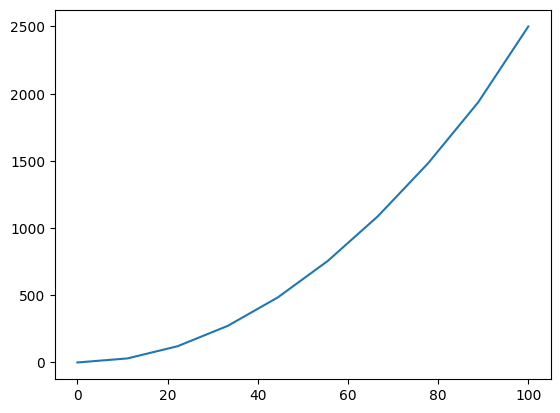

In [3]:

cov1 = np.array([[2, 0], [0, 3]])
cov2 = np.array([[2, 0], [0, 2]])
mu1 = np.array([0, 0])
mu2 = np.array([0, 0])

x = np.linspace(0, 100, 10)

y = []
for i in x:
    mu2[0] = i
    y.append(kl_divergence(mu1, mu2, cov1, cov2))

plt.plot(x, y)

In [34]:
kl_divergence(mu1, [0,5.26315789], cov1, cov2)

6.925207743767312

In [30]:
cov1 = np.array([[2, 0], [0, 3]])
cov2 = np.array([[2, 0], [0, 2]])
mu1 = np.array([0, 0])
mu2 = np.array([0, 0])

def kl_divergence(mu, m, Sigma, S):
    det_Sigma = np.linalg.det(Sigma)
    det_S = np.linalg.det(S)
    S_inv = np.linalg.inv(S)

    term1 = np.log(det_S/det_Sigma)+(m-mu).T@S_inv@(m-mu)+np.trace(S_inv@Sigma)-len(mu)
    return (1/2)*term1

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [64]:
#KL DIVERGENCE IN 1D

import matplotlib.pyplot as plt
import numpy as np

def kl_divergence(m1, m2, S1, S2):
    det_S1 = np.linalg.det(S1)
    det_S2 = np.linalg.det(S2)
    inv_S2 = np.linalg.inv(S2)

    return (1/2)*(np.log(det_S2/det_S1)+(m2-m1).T@inv_S2@(m2-m1)+np.trace(inv_S2@S1)-len(m1))

m1 = np.array([0])
S1 = np.array([[10]])

# Grid of points X=[0:25], Y=[0:1500]
X_fineness = 200000
Y_fineness = 1
X = np.linspace(0, 25, X_fineness)
Y = np.linspace(0, 4500, Y_fineness)

# Calculate the KL divergence for each point in the grid
Z = np.zeros((X_fineness, Y_fineness))
for x, mean in enumerate(X):
    for y, variance in enumerate(Y):
        m2 = m1 + mean
        S2 = S1 + variance
        Z[x,y] = kl_divergence(m1, m2, S1, S2)

kl_targets = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5]

# For all KL-targets get the KL-divergence that is closest to the target and the corresponding x and y
kl_mixed_m_v = []
for kl_target in kl_targets:
    diff = np.abs(Z-kl_target)
    x, y = np.unravel_index(diff.argmin(), diff.shape)
    m2 = X[x]
    S2 = Y[y]
    
    kl_mixed_m_v.append([kl_target, kl_divergence(m1, m1+m2, S1, S1+S2), m2, S2])

# Keeping mean fixed
print("----v----")
kl_v = []
m2 = 0
for kl_target in kl_targets:
    diff = np.abs(Z[0,:]-kl_target)
    y = np.argmin(diff)
    S2 = Y[y]
    kl_v.append([kl_target, kl_divergence(m1, m1+m2, S1, S1+S2), m2, S2])
    # print(np.round(S2,2))s

print("----m----")
kl_m = []
S2 = 0
for kl_target in kl_targets:
    diff = np.abs(Z[:,0]-kl_target)
    x = np.argmin(diff)
    m2 = X[x]
    kl_m.append([kl_target, kl_divergence(m1, m1+m2, S1, S1+S2), m2, S2])
    print(np.round(m2,2))

# print(kl_v)




----v----
----m----
0.14
0.32
0.45
1.0
1.41
2.0
2.45
2.83
3.16
3.46
3.74
4.0
4.24
4.47
6.32
10.0


In [5]:
#KL DIVERGENCE IN 2D

import matplotlib.pyplot as plt
import numpy as np

def kl_divergence(m1, m2, S1, S2):
    det_S1 = np.linalg.det(S1)
    det_S2 = np.linalg.det(S2)
    inv_S2 = np.linalg.inv(S2)

    return (1/2)*(np.log(det_S2/det_S1)+(m2-m1).T@inv_S2@(m2-m1)+np.trace(inv_S2@S1)-len(m1))

m1 = np.array([0,0])
S1 = np.array([[6.66,0],[0,6.66]])

# Grid of points X=[0:25], Y=[0:1500]
X_fineness = 1
Y_fineness = 200000
X = np.linspace(0, 25, X_fineness)
Y = np.linspace(0, 4500, Y_fineness)

# Calculate the KL divergence for each point in the grid
Z = np.zeros((X_fineness, Y_fineness))
for x, mean in enumerate(X):
    for y, variance in enumerate(Y):
        m2 = m1 + mean*np.array([1,1])
        S2 = S1 + variance*np.array([[1,0],[0,1]])
        Z[x,y] = kl_divergence(m1, m2, S1, S2)

kl_targets = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5]

# For all KL-targets get the KL-divergence that is closest to the target and the corresponding x and y
kl_mixed_m_v = []
for kl_target in kl_targets:
    diff = np.abs(Z-kl_target)
    x, y = np.unravel_index(diff.argmin(), diff.shape)
    m2 = m1 + X[x]
    S2 = S1 + Y[y]
    
    kl_mixed_m_v.append([kl_target, kl_divergence(m1, m2, S1, S2), m2, S2])

# Keeping mean fixed
print("----v----")
kl_v = []
m2 = m1 + np.array([0,0])
for kl_target in kl_targets:
    diff = np.abs(Z[0,:]-kl_target)
    y = np.argmin(diff)
    S2 = S1 +  Y[y]*np.array([[1,0],[0,1]])
    kl_v.append([kl_target, kl_divergence(m1, m2, S1, S2), m2, S2])
    print(np.round(S2,2))

print("----m----")
kl_m = []
S2 = S1 + np.array([[0,0],[0,0]])
for kl_target in kl_targets:
    diff = np.abs(Z[:,0]-kl_target)
    x = np.argmin(diff)
    m2 = m1 + X[x]*np.array([1,1])
    kl_m.append([kl_target, kl_divergence(m1, m2, S1, S2), m2, S2])
    # print(np.round(m2,2))

# print(kl_v)




----v----
[[6.98 0.  ]
 [0.   6.98]]
[[7.38 0.  ]
 [0.   7.38]]
[[7.7 0. ]
 [0.  7.7]]
[[9.29 0.  ]
 [0.   9.29]]
[[10.8  0. ]
 [ 0.  10.8]]
[[13.5  0. ]
 [ 0.  13.5]]
[[16.2  0. ]
 [ 0.  16.2]]
[[19.04  0.  ]
 [ 0.   19.04]]
[[22.07  0.  ]
 [ 0.   22.07]]
[[25.38  0.  ]
 [ 0.   25.38]]
[[28.96  0.  ]
 [ 0.   28.96]]
[[32.92  0.  ]
 [ 0.   32.92]]
[[37.24  0.  ]
 [ 0.   37.24]]
[[41.99  0.  ]
 [ 0.   41.99]]
[[126.92   0.  ]
 [  0.   126.92]]
[[2680.17    0.  ]
 [   0.   2680.17]]
----m----


Text(0.5, 1.0, 'Gaussian with fixed mean')

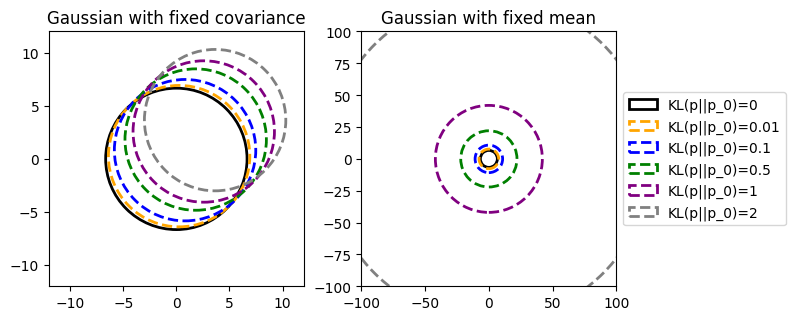

In [80]:
m = [#[0.08,0.08], # 0.001
     # [0.18,0.18], # 0.05
     [0.26,0.26], # 0.01
     # [0.58,0.58], # 0.05
     [0.82,0.82], # 0.1
     # [1.15,1.15], # 0.2
     # [1.41,1.41], # 0.3
     # [1.63,1.63], # 0.4
     [1.82,1.82], # 0.5
     # [2.,2.],     # 0.6
     # [2.16,2.16], # 0.7
     # [2.31,2.31], # 0.8
     # [2.45,2.45], # 0.9
     [2.58,2.58], # 1
     [3.65,3.65]] # 2
S = [#[[6.98,  0], [0,   6.98]], # 0.001
     # [[7.38,  0], [0,   7.38]], # 0.05
     [[7.7,   0], [0,   7.7]],  # 0.01
     # [[9.29,  0], [0,   9.29]], # 0.05
     [[10.8,  0], [0,  10.8]],  # 0.1
     # [[13.5,  0], [0,  13.5]],  # 0.2
     # [[16.2,  0], [0,  16.2]],  # 0.3
     # [[19.04, 0], [0,  19.04]], # 0.4   
     [[22.07, 0], [0,  22.07]], # 0.5
     # [[25.38, 0], [0,  25.38]], # 0.6
     # [[28.96, 0], [0,  28.96]], # 0.7
     # [[32.92, 0], [0,  32.92]], # 0.8
     # [[37.24, 0], [0,  37.24]], # 0.9
     [[41.99, 0], [0,  41.99]], # 1
     [[126.9, 0], [0, 126.92]]] # 2

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def kl_divergence(m1, m2, S1, S2):
    det_S1 = np.linalg.det(S1)
    det_S2 = np.linalg.det(S2)
    inv_S2 = np.linalg.inv(S2)

    return (1/2)*(np.log(det_S2/det_S1)+(m2-m1).T@inv_S2@(m2-m1)+np.trace(inv_S2@S1)-len(m1))

# Plot a circle with zero mean and radius 1
fig, ax = plt.subplots(1,2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
plt.tight_layout()

colors = ["orange", "blue", "green", "purple", "gray", ]

deltas = [0.01, 0.1, 0.5, 1, 2]

ax[0].add_patch(Circle((0,0), 6.66, color = "black",fill=False, lw=2, alpha=1, label=0))
for d, c, m in zip(deltas, colors, m):
     ax[0].add_patch(Circle((m[0], m[1]), 6.66, color = c,fill=False, lw=2, ls = '--', alpha=1, label=f"KL(p||p_0)={d}, m={m[0]}"))

ax[0].set_xlim(-12, 12)
ax[0].set_ylim(-12, 12)
ax[0].set_title("Gaussian with fixed covariance")

# ax[0].legend()


ax[1].set_xlim(-100, 100)
ax[1].set_ylim(-100, 100)

ax[1].add_patch(Circle((0, 0), 6.66, color = "black",fill=False, lw=2, alpha=1, label=f"KL(p||p_0)={0}"))
for d, c, s in zip(deltas, colors, S):
     ax[1].add_patch(Circle((0, 0), s[0][0], color = c,fill=False, lw=2, ls = '--', alpha=1, label=f"KL(p||p_0)={d}"))

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].set_title("Gaussian with fixed mean")





Text(0.5, 1.0, 'Zoomed in')

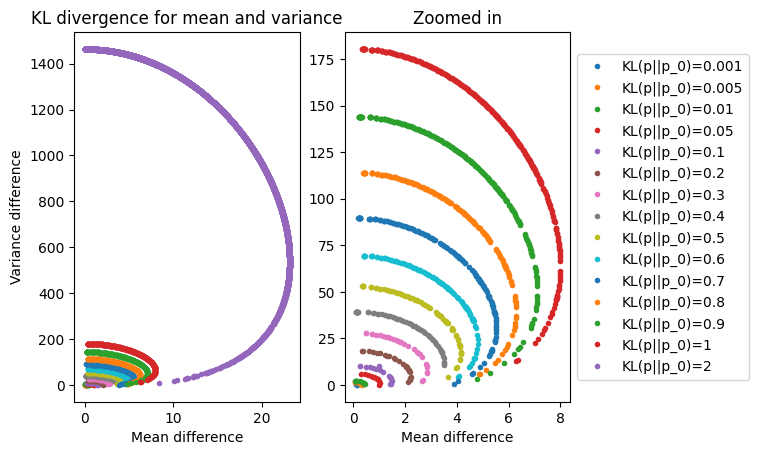

In [88]:
# KL divergence contours 1d

#KL DIVERGENCE IN 1D

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)

# set zero horizontal space between plots
# plt.subplots_adjust(wspace=0)

# ax[0].set_aspect('equal')
# ax[1].set_aspect('equal')

def kl_divergence(m1, m2, S1, S2):
    det_S1 = np.linalg.det(S1)
    det_S2 = np.linalg.det(S2)
    inv_S2 = np.linalg.inv(S2)

    return (1/2)*(np.log(det_S2/det_S1)+(m2-m1).T@inv_S2@(m2-m1)+np.trace(inv_S2@S1)-len(m1))

m1 = np.array([0])
S1 = np.array([[10]])

# Grid of points X=[0:25], Y=[0:1500]
X_fineness = 4000
Y_fineness = 4000
X = np.linspace(0, 25, X_fineness)
Y = np.linspace(0, 1500, Y_fineness)

deltas = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2]

# Calculate the KL divergence for each point in the grid
Z = np.zeros((X_fineness, Y_fineness))
for x, mean in enumerate(X):
    for y, variance in enumerate(Y):
        m2 = m1 + mean
        S2 = S1 + variance
        Z[x,y] = kl_divergence(m1, m2, S1, S2)
    
# For all delta values +- 0.0001, find and plot the corresponding KL divergence
for d in deltas:
    x, y = np.where(np.abs(Z-d) < 0.0001)
    ax[0].plot(X[x], Y[y], '.', label=f"KL(p||p_0)={d}")


# For all delta values +- 0.0001, find and plot the corresponding KL divergence
for d in deltas[:-1]:
    x, y = np.where(np.abs(Z-d) < 0.0001)
    ax[1].plot(X[x], Y[y], '.', label=f"KL(p||p_0)={d}")
ax[1].plot(1, 10, '.', label=f"KL(p||p_0)=2")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].set_xlabel("Mean difference")
ax[1].set_xlabel("Mean difference")
ax[0].set_ylabel("Variance difference")

ax[0].set_title("KL divergence for mean and variance")
ax[1].set_title("Zoomed in")

